## 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_boston

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.metrics import r2_score

In [7]:
import matplotlib.pyplot as plt

## 2 - Chargement des données du Boston Housing Dataset Boston

In [8]:
boston = load_boston()

In [9]:
pd.DataFrame(data = boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 3 - 1  Afficher la description des données en utilisant l'attribut DESCR

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 3 - 2 afficher le dataFrame Boston

In [12]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 4 - Créer un tableau Numpy noté x stockant les 506 valeurs de la caractéristique RM

In [13]:
x = df['RM'].values
x

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [14]:
print(type(x))

<class 'numpy.ndarray'>


## 5 - Créer un tableau Numpy noté y stockant les 506 valeurs de la caractéristique MDEV

In [15]:
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
y = df['MEDV'].values

## 6 - Calculer le coefficient de corrélation entre x et y 相関係数

In [17]:
r = np.corrcoef(x, y)

In [18]:
# coefficient de corrélation
r

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

x est en 1D mais il faut avoir 2D car x est une tableau(506 ligne, 1 column de RM), donc il faut convertir en 2D avec reshape()

In [19]:
x.shape

(506,)

In [20]:
x = np.reshape(x, (506, 1))

# np.reshape(x, (-1, 1)) => general

In [21]:
x.shape

(506, 1)

## 7 - Effectuer la régression linéaire entre x et y utilisant la fonction LinearRegression() de la librairie scikit-learn  線形回帰

In [34]:
lr = LinearRegression()
#x = df[['RM']].values  : on peut mettre x en 2D comme ça mais c'est mieux de convertir avec reshape() pour l'usage de plus tard
lr.fit(x, y)

LinearRegression()

In [23]:
df[['RM']].shape

(506, 1)

## 8 - Afficher le coefficient directeur de la droite calculée par le modèle  直進係数 a

In [24]:
lr.coef_

array([9.10210898])

In [25]:
a = lr.coef_[0]
print("coefficient directeur : ", a)

coefficient directeur :  9.10210898118031


## 9 - Afficher l'ordonnée à l'origine de la droite calculée par le modèle 直線の切片 b

In [26]:
b = lr.intercept_
print("l'ordonnée à l'origine de la droite : ", b)

l'ordonnée à l'origine de la droite :  -34.67062077643857


## 10 - 1 Calculer et afficher l'erreur quadratique moyenne 平均二乗誤差

In [27]:
y_predict = lr.predict(x)

In [28]:
# model
#y_predict = a * x + b

In [29]:
# erreur quadratique moyenne
mse = mean_squared_error(y, y_predict)
print("l'erreur quadratique moyenne : ", mse)

l'erreur quadratique moyenne :  43.60055177116956


## 10 - 2 Calculer et afficher la racine de l'écart quadratique moyen : root-mean-square error 

In [30]:
rms = mean_squared_error(y, y_predict, squared=False)
print("racine de l'écart quadratique moyen : ", rms)

racine de l'écart quadratique moyen :  6.603071389222561


## 11 - Calculer et afficher le coefficient de détermination 決定係数

In [31]:
# R² (coefficient of determination) regression score function

r2 = r2_score(y, y_predict)
print("coefficient de détermination", r2)

coefficient de détermination 0.48352545599133423


In [37]:
r2 = lr.score(x, y)
print("coefficient de détermination", r2)

coefficient de détermination 0.48352545599133423


## 12 - Afficher sur un même graphique

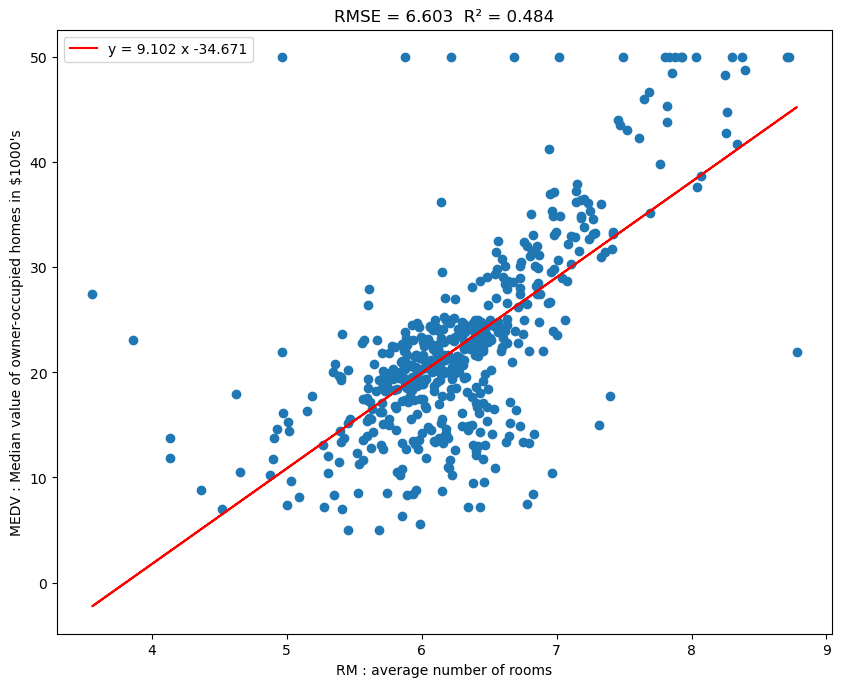

In [32]:
plt.figure(1, figsize=(10, 8), dpi=100)
plt.title("RMSE = " + str(rms.round(3)) + "  R² = " + str(r2.round(3)))
#plt.title("RMSE = 6.603071389222561 - R² = 0.48352545599133423")

plt.xlabel("RM : average number of rooms")
plt.ylabel("MEDV : Median value of owner-occupied homes in $1000's")
plt.scatter(x, y)
#plt.plot(x, y_predict, "-r", label="y = 9.10 x - 34.67 ")
plt.plot(x, y_predict, "-r", label="y = " + str(a.round(3)) + " x " + str(b.round(3)))
plt.legend()
plt.show()